# Linear regression in Python

Introduction to Python. Linear regression using Weather.csv from https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f#targetText=Linear%20regression%20performs%20the%20task,the%20name%20is%20Linear%20Regression.

### Import libraries

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### Import dataset

In [27]:
dataset=pd.read_csv('C:/Users/Albert/Downloads/Weather.csv')

C:\Users\Albert\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [33]:
dataset.shape
dataset.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


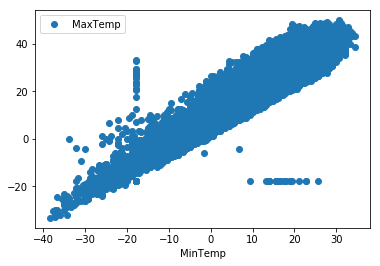

In [39]:
dataset.plot(x='MinTemp', y='MaxTemp', style='o')

C:\Users\Albert\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


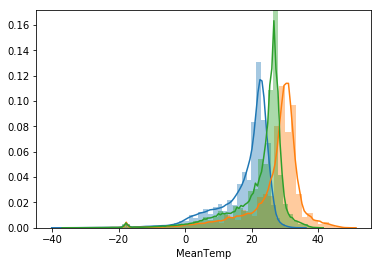

In [45]:
seabornInstance.distplot(dataset['MinTemp'])
seabornInstance.distplot(dataset['MaxTemp'])
seabornInstance.distplot(dataset['MeanTemp'])

### Linear model

In [58]:
X = dataset['MinTemp'].values.reshape(-1,1)
Y = dataset['MaxTemp'].values.reshape(-1,1)
print(X)

[[22.22222222]
 [21.66666667]
 [22.22222222]
 ...
 [18.33333333]
 [18.33333333]
 [17.22222222]]


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [64]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [71]:
# Intercept and slope
print(regressor.intercept_)
print(regressor.coef_)

[10.66185201]
[[0.92033997]]


In [76]:
# Predict and compare actual vs predicted
y_pred=regressor.predict(X_test)
df=pd.DataFrame({'Actual':y_test.flatten(), 'Predicted':y_pred.flatten()})
df.head()

,Actual,Predicted
0,28.888889,33.670351
1,31.111111,30.091251
2,27.222222,26.512151
3,28.888889,31.113851
4,23.333333,15.774852


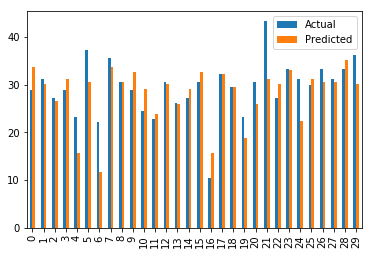

In [79]:
df1=df.head(30)
df1.plot(kind='bar')

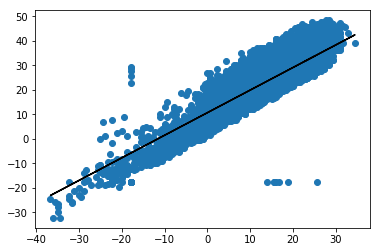

In [83]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='black')

### Error metrics

In [84]:
#Accuracy measures
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 3.19932917837853
Mean Squared Error: 17.631568097568447
Root Mean Squared Error: 4.198996082109204
